<a href="https://colab.research.google.com/github/Nishantthakurrr/Sports-Data-Analysis-Ipl/blob/main/Sports_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

####Questions:-
1. Who received the most amount of Player Of The Match?
2. Which TEAM won most amount of TOSS?
3. Batsman Performance Analysis?
4. Toss decision across seasons.
5. Weather wining toss implies on wining game or not?


In [2]:
#Reading the CSV DATA

Ball_data=pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQfp1dxx54z95iyzlFaLUK9J6GeDyxhJCPLNUoCjibcodCJeKX46EnZbcDYm1LM0f62r7o2zRoLi7BN/pub?output=csv")
Matches_data=pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSETURtRJ2hWEoA9zJaNhWML9jC74KjE153-uekMTp1mJFWxpSTIWlqbVRrOT2iXosYl-RHjArjIaQ_/pub?output=csv")
Ball_data.head(6)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
5,335982,1,7,4,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [3]:
Matches_data.head(6)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
5,335987,Jaipur,2008-04-21,SR Watson,Sawai Mansingh Stadium,0,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,bat,Rajasthan Royals,wickets,6.0,N,NaN,Aleem Dar,RB Tiffin


In [4]:
# Name of columns in the both of the Dataset

Ball_data.columns, Matches_data.columns

(Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
        'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
        'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
        'batting_team', 'bowling_team'],
       dtype='object'),
 Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
        'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
        'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
       dtype='object'))

In [5]:
# Total number of matches played from 2008 to 2020..
Matches_data.shape[0]
# 816 is the number of matches played

816

In [6]:
# Name of the venues for match

Matches_data["venue"].unique(), len(Matches_data["venue"].unique())

# Total 36 venues

(array(['M Chinnaswamy Stadium',
        'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
        'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
        'Rajiv Gandhi International Stadium, Uppal',
        'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
        'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
        'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
        'OUTsurance Oval', 'Brabourne Stadium',
        'Sardar Patel Stadium, Motera', 'Barabati Stadium',
        'Vidarbha Cricket Association Stadium, Jamtha',
        'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
        'Holkar Cricket Stadium',
        'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
        'Subrata Roy Sahara Stadium',
        'Shaheed Veer Narayan Singh International Stadium',
        'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
        'Sharjah Cricket Stadium', 'Dubai Interna

In [7]:
 #Number of teams

 Matches_data["team1"].unique(), len(Matches_data["team1"].unique())

 # Total number of 15 teams

(array(['Royal Challengers Bangalore', 'Kings XI Punjab',
        'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
        'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
        'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
        'Gujarat Lions', 'Rising Pune Supergiants',
        'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object),
 15)

(toss_winner
 Mumbai Indians                 106
 Kolkata Knight Riders           98
 Chennai Super Kings             97
 Royal Challengers Bangalore     87
 Rajasthan Royals                87
 Kings XI Punjab                 85
 Delhi Daredevils                80
 Sunrisers Hyderabad             57
 Deccan Chargers                 43
 Pune Warriors                   20
 Delhi Capitals                  20
 Gujarat Lions                   15
 Kochi Tuskers Kerala             8
 Rising Pune Supergiants          7
 Rising Pune Supergiant           6
 Name: count, dtype: int64,
 <Axes: title={'center': 'Maximum toss winner'}, xlabel='toss_winner'>)

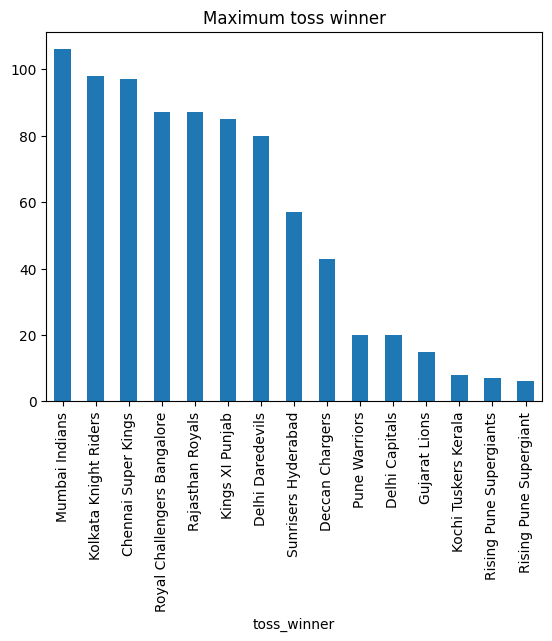

In [8]:
# Maximum toss winner team

Matches_data["toss_winner"].value_counts(),Matches_data["toss_winner"].value_counts().plot(kind="bar",title="Maximum toss winner")

# You can see the bar plot

(player_of_match
 AB de Villiers    23
 CH Gayle          22
 RG Sharma         18
 DA Warner         17
 MS Dhoni          17
 SR Watson         16
 YK Pathan         16
 SK Raina          14
 V Kohli           13
 G Gambhir         13
 AM Rahane         12
 MEK Hussey        12
 AD Russell        11
 A Mishra          11
 KA Pollard        11
 DR Smith          11
 V Sehwag          11
 Name: count, dtype: int64,
 <Axes: title={'center': 'Player of the Match'}, xlabel='player_of_match'>)

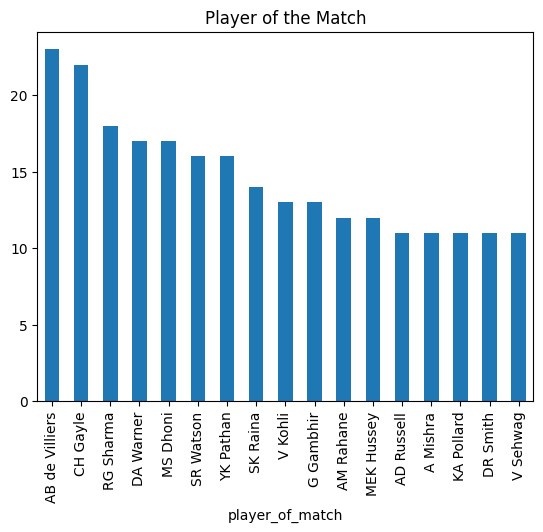

In [9]:
# Player of the Match

Matches_data["player_of_match"].value_counts().head(17),Matches_data["player_of_match"].value_counts().head(17).plot(kind="bar",title="Player of the Match")

# You can see the Top Ten Players to get the most amount of Player of the match

# You can see the bar plot

In [10]:
# Total Number Of Batsman

Ball_data["batsman"].unique()

array(['RT Ponting', 'BB McCullum', 'DJ Hussey', 'Mohammad Hafeez',
       'SC Ganguly', 'CL White', 'MV Boucher', 'B Akhil', 'AA Noffke',
       'P Kumar', 'Z Khan', 'SB Joshi', 'W Jaffer', 'JH Kallis',
       'R Dravid', 'V Kohli', 'K Goel', 'MEK Hussey', 'JR Hopes',
       'SK Raina', 'JDP Oram', 'S Badrinath', 'PA Patel', 'ML Hayden',
       'MS Dhoni', 'KC Sangakkara', 'Yuvraj Singh', 'SM Katich',
       'IK Pathan', 'T Kohli', 'YK Pathan', 'S Dhawan', 'G Gambhir',
       'SK Warne', 'D Salunkhe', 'SK Trivedi', 'V Sehwag', 'SR Watson',
       'M Kaif', 'DS Lehmann', 'RA Jadeja', 'M Rawat', 'L Ronchi',
       'ST Jayasuriya', 'DJ Thornely', 'RV Uthappa', 'PR Shah',
       'AM Nayar', 'SM Pollock', 'Harbhajan Singh', 'S Chanderpaul',
       'LRPL Taylor', 'WP Saha', 'AS Yadav', 'A Symonds', 'SB Bangar',
       'WPUJC Vaas', 'RP Singh', 'AC Gilchrist', 'Y Venugopal Rao',
       'VVS Laxman', 'RG Sharma', 'SB Styris', 'LR Shukla', 'PP Chawla',
       'Kamran Akmal', 'DPMD Jayawardene'

In [11]:
filter= Ball_data["batsman"]=="V Kohli"

In [12]:
# Data of Virat Kohli
Virat_kohli=Ball_data[filter]
Virat_kohli

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
211,335982,2,1,2,V Kohli,W Jaffer,I Sharma,0,0,0,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
212,335982,2,1,3,V Kohli,W Jaffer,I Sharma,0,4,4,0,0,NaN,NaN,NaN,legbyes,Royal Challengers Bangalore,Kolkata Knight Riders
213,335982,2,1,4,V Kohli,W Jaffer,I Sharma,1,0,1,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
216,335982,2,2,1,V Kohli,W Jaffer,AB Dinda,0,0,0,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
217,335982,2,2,2,V Kohli,W Jaffer,AB Dinda,0,0,0,0,1,bowled,V Kohli,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192772,1237178,1,0,5,V Kohli,D Padikkal,Sandeep Sharma,0,0,0,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Sunrisers Hyderabad
192773,1237178,1,0,6,V Kohli,D Padikkal,Sandeep Sharma,1,0,1,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Sunrisers Hyderabad
192774,1237178,1,1,1,V Kohli,D Padikkal,JO Holder,2,0,2,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Sunrisers Hyderabad
192775,1237178,1,1,2,V Kohli,D Padikkal,JO Holder,0,0,0,0,1,caught,V Kohli,SP Goswami,NaN,Royal Challengers Bangalore,Sunrisers Hyderabad


In [13]:
#
Virat_kohli.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')

(dismissal_kind
 caught               105
 bowled                30
 run out               15
 lbw                    7
 stumped                3
 caught and bowled      3
 Name: count, dtype: int64,
 <Axes: title={'center': 'Virat Kohli Dismissal Kind'}, ylabel='count'>)

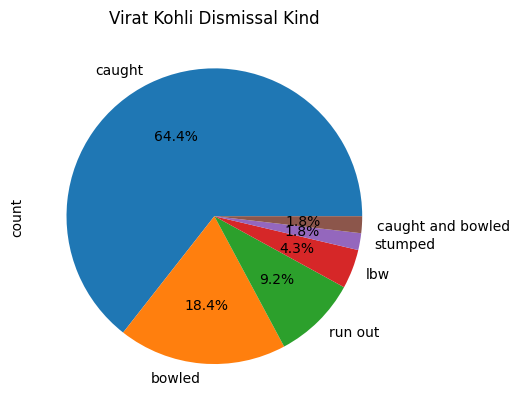

In [20]:
Virat_kohli["dismissal_kind"].value_counts() ,Virat_kohli["dismissal_kind"].value_counts().plot(kind="pie", autopct='%1.1f%%', title="Virat Kohli Dismissal Kind")

In [15]:
# You can check the number of 1's, 2's and boundries scored by Virat Kohli
Virat_kohli["batsman_runs"].value_counts()


,count
batsman_runs,
1,1919
0,1625
4,504
2,346
6,202
3,13


In [16]:
Runs = Virat_kohli["batsman_runs"].value_counts()
Runs

,count
batsman_runs,
1,1919
0,1625
4,504
2,346
6,202
3,13


In [17]:
Runs = Runs.drop(Runs.index[1])
Runs

,count
batsman_runs,
1,1919
4,504
2,346
6,202
3,13


<Axes: xlabel='batsman_runs'>

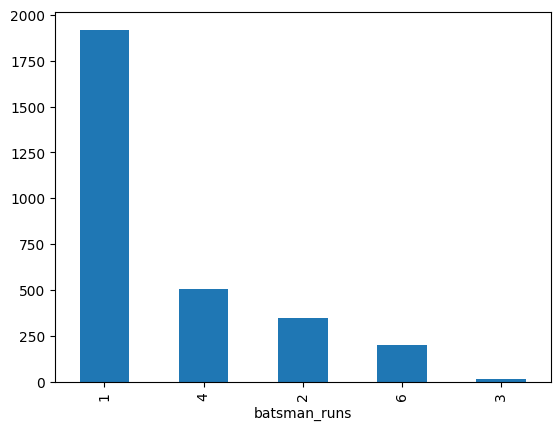

In [18]:
Runs.plot(kind="bar") # As you can see virat kohli has most numbers of hits for sinle and least numbers of 3's

In [22]:
Matches_data.head(10)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
5,335987,Jaipur,2008-04-21,SR Watson,Sawai Mansingh Stadium,0,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,bat,Rajasthan Royals,wickets,6.0,N,NaN,Aleem Dar,RB Tiffin
6,335988,Hyderabad,2008-04-22,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,Delhi Daredevils,wickets,9.0,N,NaN,IL Howell,AM Saheba
7,335989,Chennai,2008-04-23,ML Hayden,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6.0,N,NaN,DJ Harper,GA Pratapkumar
8,335990,Hyderabad,2008-04-24,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,3.0,N,NaN,Asad Rauf,MR Benson
9,335991,Chandigarh,2008-04-25,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Kings XI Punjab,runs,66.0,N,NaN,Aleem Dar,AM Saheba


In [24]:
Matches_data["date"]=pd.to_datetime(Matches_data["date"])
Matches_data["date"].dt.year

,date
0,2008
1,2008
2,2008
3,2008
4,2008
5,2008
6,2008
7,2008
8,2008
9,2008


In [25]:
Matches_data["Year"]=Matches_data["date"].dt.year
Matches_data["Year"].

<Axes: title={'center': 'Toss Decision'}, xlabel='Year'>

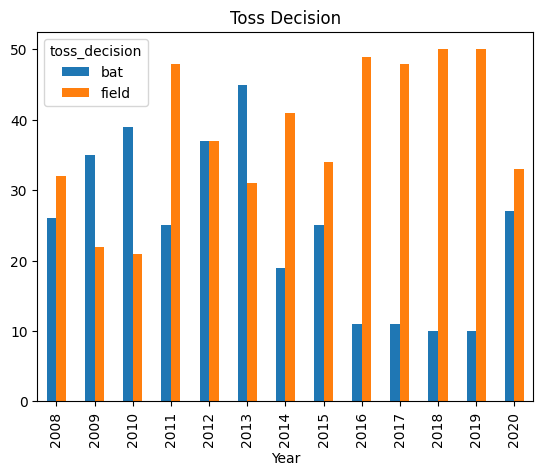

In [29]:
#
Matches_data.pivot_table(index="Year", columns="toss_decision", values="toss_winner", aggfunc="count"),
Matches_data.pivot_table(index="Year", columns="toss_decision", values="toss_winner", aggfunc="count").plot(kind="bar", title="Toss Decision")

In [30]:
Matches_data.head(11)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Year
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008
5,335987,Jaipur,2008-04-21,SR Watson,Sawai Mansingh Stadium,0,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,bat,Rajasthan Royals,wickets,6.0,N,NaN,Aleem Dar,RB Tiffin,2008
6,335988,Hyderabad,2008-04-22,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,Delhi Daredevils,wickets,9.0,N,NaN,IL Howell,AM Saheba,2008
7,335989,Chennai,2008-04-23,ML Hayden,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6.0,N,NaN,DJ Harper,GA Pratapkumar,2008
8,335990,Hyderabad,2008-04-24,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,3.0,N,NaN,Asad Rauf,MR Benson,2008
9,335991,Chandigarh,2008-04-25,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Kings XI Punjab,runs,66.0,N,NaN,Aleem Dar,AM Saheba,2008


In [33]:
from mmap import MADV_FREE
# Match the data
Matches_data[["toss_winner","winner"]]

,toss_winner,winner
0,Royal Challengers Bangalore,Kolkata Knight Riders
1,Chennai Super Kings,Chennai Super Kings
2,Rajasthan Royals,Delhi Daredevils
3,Mumbai Indians,Royal Challengers Bangalore
4,Deccan Chargers,Kolkata Knight Riders
...,...,...
811,Mumbai Indians,Royal Challengers Bangalore
812,Delhi Capitals,Mumbai Indians
813,Sunrisers Hyderabad,Sunrisers Hyderabad
814,Delhi Capitals,Delhi Capitals


<Axes: title={'center': 'Wining Ratio'}, ylabel='count'>

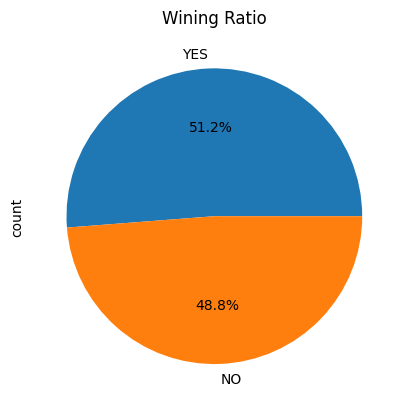

In [42]:
# You can check the ratio

Matches_data["Wining Ratio"] = (Matches_data["toss_winner"] == Matches_data["winner"]).map({True: "YES", False: "NO"})
Matches_data["Wining Ratio"].value_counts(),
Matches_data["Wining Ratio"].value_counts().plot(kind="pie", autopct='%1.1f%%', title="Wining Ratio")

# Wining Toss effects the winning ratio